In [1]:
import numpy as np

In [2]:
spreads = [61, 367]
nu = [53.0, 5.14]

In [3]:
quantile_levels = [0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 0.999, 0.9999]

In [4]:
CVA0 = np.array([510.60, 450.42, 393.71, 340.00, 288.51, 238.22, 188.83, 139.87, 89.66, 67.12, 39.47, 19.80, 13.73])
DVA0 = np.array([117.27, 102.88, 89.33, 76.52, 64.43, 52.70, 41.33, 29.91, 18.23, 13.16, 7.80, 4.41, 3.70])
KVA0 = np.array([672.39, 565.00, 467.07, 377.63, 295.97, 221.63, 154.33, 94.12, 41.59, 23.15, 6.77, 0.56, 0.05])
MLA0 = np.array([0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00])
MVA0 = np.array([31.51, 62.28, 94.19, 127.85, 164.21, 204.72, 251.93, 311.35, 399.46, 456.68, 564.77, 750.22, 903.11])

In [5]:
CVA1 = np.array([40.89, 36.13, 31.65, 27.40, 23.32, 19.34, 15.40, 11.45, 7.35, 5.49, 3.19, 1.52, 1.01])
DVA1 = np.array([67.09, 59.07, 51.48, 44.32, 37.47, 30.85, 24.42, 18.04, 11.49, 8.68, 5.26, 2.75, 2.03])
KVA1 = np.array([58.56, 49.25, 40.75, 32.98, 25.88, 19.40, 13.53, 8.27, 3.66, 2.04, 0.60, 0.05, 0.00])
MLA1 = np.array([0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00])
MVA1 = np.array([14.70, 31.53, 49.17, 67.84, 88.03, 110.50, 136.68, 169.58, 218.27, 249.84, 309.33, 411.01, 494.45])

In [6]:
CVA = [CVA0, CVA1]
DVA = [DVA0, DVA1]
KVA = [KVA0, KVA1]
FVA = [MLA0 + MVA0, MLA1 + MVA1]

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')
sns.set_style("whitegrid")

D:\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


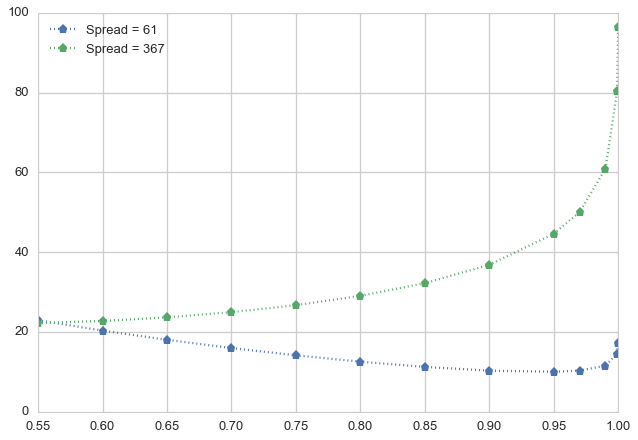

In [8]:
for i, s in enumerate(spreads):
    BVA = (CVA[i] + FVA[i] + KVA[i]) / nu[i]
    plt.plot(quantile_levels, BVA, "p:", label='Spread = %i' % s)
    
plt.ylim(0., 100.)
plt.legend(loc='upper left')
plt.show()

In [9]:
from matplotlib.ticker import FuncFormatter

formatter = FuncFormatter(lambda y, pos: "%.0f %%" % (100 * y))

In [10]:
index = 0

D:\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


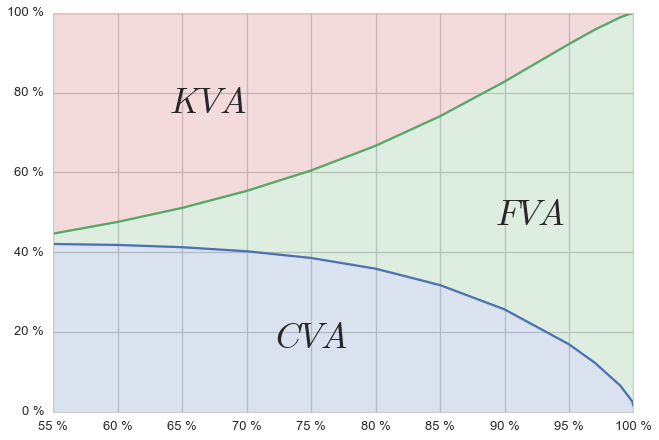

In [11]:
tva = (CVA[index] + FVA[index] + KVA[index])
frac_cva = np.divide(CVA[index], tva)
frac_cva_p_fva = np.divide(CVA[index] + FVA[index], tva)

palette = sns.color_palette(None, 3)
sns.set_palette(palette)

alpha = 0.2

fig, ax = plt.subplots(1)

ax.plot(quantile_levels, frac_cva)
ax.plot(quantile_levels, frac_cva_p_fva)
ax.plot(quantile_levels, map(lambda x: 1., quantile_levels))

ax.fill_between(quantile_levels, 0., frac_cva, where = frac_cva >= 0., 
                interpolate=True, color=palette.pop(0), alpha=alpha)

ax.text(0.75, 0.16, r"$CVA$", horizontalalignment='center', fontsize=35)

ax.fill_between(quantile_levels, frac_cva, frac_cva_p_fva, where = frac_cva_p_fva >= frac_cva,
                interpolate=True, color=palette.pop(0), alpha=alpha)

ax.text(0.92, 0.47, r"$FVA$", horizontalalignment='center', fontsize=35)

ax.fill_between(quantile_levels, frac_cva_p_fva, 1.0, where = 1. >= frac_cva_p_fva,
                interpolate=True, color=palette.pop(0), alpha=alpha)

ax.text(0.67, 0.75, r"$KVA$", horizontalalignment='center', fontsize=35)

ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)

plt.show()

In [12]:
index = 1

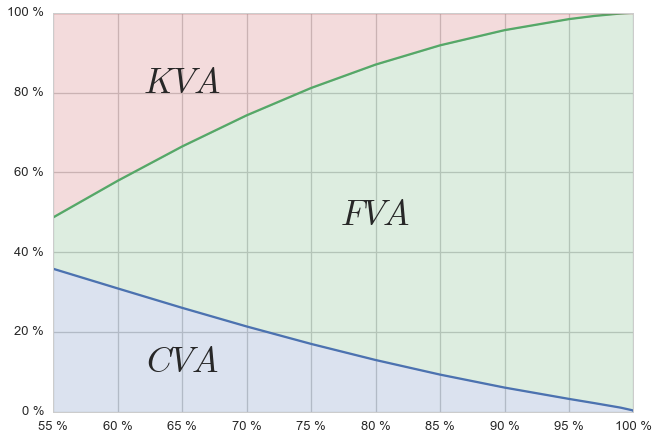

In [13]:
tva = (CVA[index] + FVA[index] + KVA[index])
frac_cva = np.divide(CVA[index], tva)
frac_cva_p_fva = np.divide(CVA[index] + FVA[index], tva)

palette = sns.color_palette(None, 3)
sns.set_palette(palette)

alpha = 0.2

fig, ax = plt.subplots(1)

ax.plot(quantile_levels, frac_cva)
ax.plot(quantile_levels, frac_cva_p_fva)
ax.plot(quantile_levels, map(lambda x: 1., quantile_levels))

ax.fill_between(quantile_levels, 0., frac_cva, where = frac_cva >= 0., 
                interpolate=True, color=palette.pop(0), alpha=alpha)

ax.text(0.65, 0.1, r"$CVA$", horizontalalignment='center', fontsize=35)

ax.fill_between(quantile_levels, frac_cva, frac_cva_p_fva, where = frac_cva_p_fva >= frac_cva,
                interpolate=True, color=palette.pop(0), alpha=alpha)

ax.text(0.80, 0.47, r"$FVA$", horizontalalignment='center', fontsize=35)

ax.fill_between(quantile_levels, frac_cva_p_fva, 1.0, where = 1. >= frac_cva_p_fva,
                interpolate=True, color=palette.pop(0), alpha=alpha)

ax.text(0.65, 0.80, r"$KVA$", horizontalalignment='center', fontsize=35)

ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)

plt.show()